 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
whale_returns_csv_path = Path("Resources/whale_returns.csv")
algo_returns_csv_path = Path("Resources/algo_returns.csv")
sp500_history_csv_path = Path("Resources/sp500_history.csv")

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
whale_returns_df = pd.read_csv(whale_returns_csv_path)
whale_returns_df.head()


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Reading whale return

whale_returns_df = pd.read_csv(whale_returns_csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)


In [5]:
# Count nulls
whale_returns_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [6]:
# Drop nulls
whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [7]:
whale_returns_df['SOROS FUND MANAGEMENT LLC'] = whale_returns_df['SOROS FUND MANAGEMENT LLC'].fillna("Unnamed")
whale_returns_df['PAULSON & CO.INC. '] = whale_returns_df['PAULSON & CO.INC. '].fillna("Unnamed")
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,Unnamed,Unnamed,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.00223,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [8]:
whale_returns_df.dropna(inplace=True)
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.00223,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(algo_returns_csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [10]:
# Count nulls
algo_returns_df.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [11]:
# Drop nulls
algo_returns_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [12]:
algo_returns_df.dropna(inplace=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices
sp500_history_df = pd.read_csv(sp500_history_csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_df = sp500_history_df.sort_index()
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [21]:
# Check Data Types
sp500_history_df.dtypes

Close    float64
dtype: object

In [22]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df.dtypes


Close    float64
dtype: object

In [23]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [24]:
# Drop nulls
sp500_history_df.dropna(inplace=True)
sp500_history_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [25]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["SP500 Closing"]
sp500_history_df.columns = columns
sp500_history_df.head()

,SP500 Closing
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


## Combine Whale, Algorithmic, and S&P 500 Returns

In [26]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_off_portfolio_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis="columns", join="inner")

#sort
whale_off_portfolio_df.sort_index(inplace=True)
whale_off_portfolio_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Closing
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.00223,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [27]:
# Plot daily returns of all portfolios
#1 calculate first, part two below is plot

daily_whale_returns = whale_off_portfolio_df.pct_change()
daily_whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Closing
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.001196
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.014174
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.003944


<Axes: xlabel='Date'>

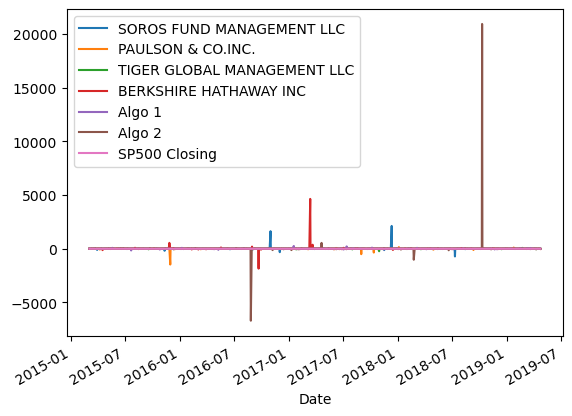

In [28]:
#2. Part two plotting of daily calculations

daily_whale_returns.plot()

#### Calculate and Plot cumulative returns.

In [29]:
# Calculate cumulative returns of all portfolios

cumulative_whale_returns = (1 + daily_whale_returns).cumprod() - 1

cumulative_whale_returns.head()

C:\Users\monic\anaconda3\envs\dev\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Closing
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,-4.173432,-1.818399,-5.751772,-2.024002,-0.508246,-5.553173,-0.003198
2015-03-06,5.246788,-0.282397,16.115278,0.994020,1.552226,11.070068,-0.017326
2015-03-09,-1.460116,-1.848387,-12.790828,-0.748434,1.804686,-2.372559,-0.013450


<Axes: xlabel='Date'>

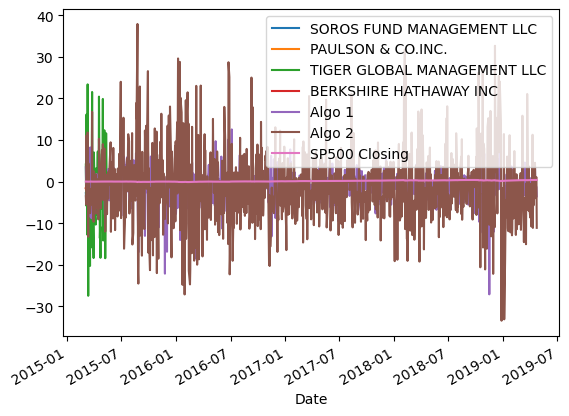

In [30]:
# Plot cumulative returns
cumulative_whale_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: xlabel='Date'>

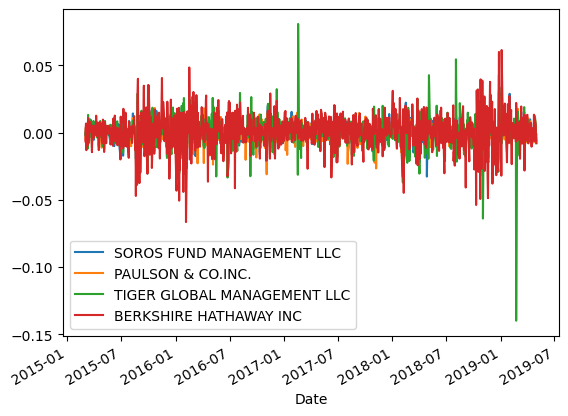

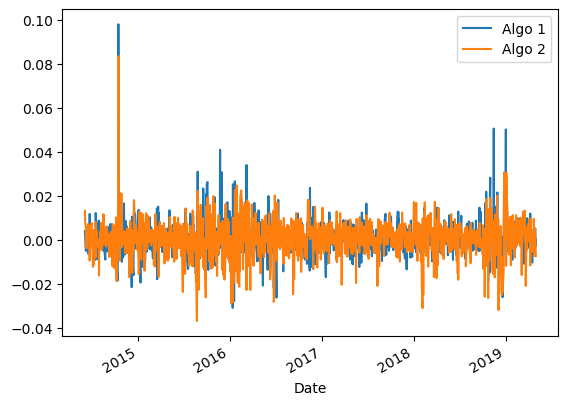

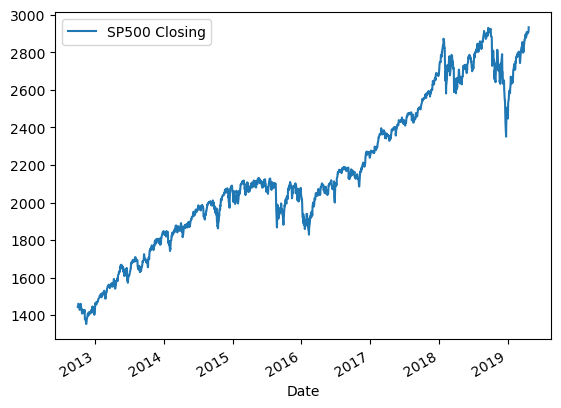

In [31]:
# Box plot to visually show risk
whale_returns_df.plot()
algo_returns_df.plot()
sp500_history_df.plot()


### Calculate Standard Deviations

In [32]:
# Calculate the daily standard deviations of all portfolios
std_daily_whale_returns = daily_whale_returns.std()
std_daily_whale_returns.head()

SOROS FUND MANAGEMENT LLC            NaN
PAULSON & CO.INC.                    NaN
TIGER GLOBAL MANAGEMENT LLC          NaN
BERKSHIRE HATHAWAY INC               NaN
Algo 1                         15.710988
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [33]:
# Calculate  the daily standard deviation of S&P 500

std_sp500_history_df = sp500_history_df.std()
std_sp500_history_df

# Determine which portfolios are riskier than the S&P 500
#SP500 appears to deviate more from the mean than Algo and Whale.

SP500 Closing    402.122004
dtype: float64

### Calculate the Annualized Standard Deviation

In [34]:
# Calculate the annualized standard deviation (252 trading days)
sp500_annualized_std = std_sp500_history_df * np.sqrt(252)
sp500_annualized_std.head()

SP500 Closing    6383.488916
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

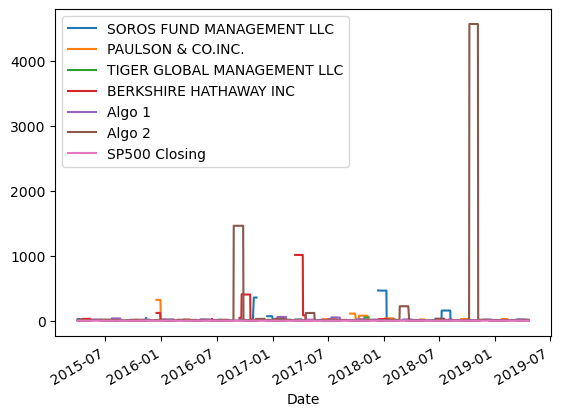

In [35]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
daily_whale_returns.rolling(window=21).std()
# Plot the rolling standard deviation
daily_whale_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [38]:
# Calculate the correlation
whale_off_correlation = whale_off_portfolio_df.corr()

# Display de correlation matrix

whale_off_correlation.style.background_gradient(cmap="summer")


C:\Users\monic\AppData\Local\Temp\ipykernel_26264\1766188066.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  whale_off_correlation = whale_off_portfolio_df.corr()


,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Closing
TIGER GLOBAL MANAGEMENT LLC,1.000000,0.424423,0.164387,0.507414,-0.047823
BERKSHIRE HATHAWAY INC,0.424423,1.000000,0.292033,0.688082,0.041547
Algo 1,0.164387,0.292033,1.000000,0.288243,-0.012608
Algo 2,0.507414,0.688082,0.288243,1.000000,0.036267
SP500 Closing,-0.047823,0.041547,-0.012608,0.036267,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [39]:
# Calculate covariance of a single portfolio                                                                                                                   

covariance = daily_whale_returns['Algo 2'].cov(daily_whale_returns['SP500 Closing'])

covariance



-0.6691221874317541

In [40]:
# Calculate variance of S&P 500
variance = sp500_history_df.var()

variance

SP500 Closing    161702.106111
dtype: float64

In [50]:
# Computing beta

sp500_beta = covariance / variance


print(f"S&P: {sp500_beta}")

S&P: SP500 Closing   -0.000004
dtype: float64


<Axes: title={'center': 'S&P 500'}>

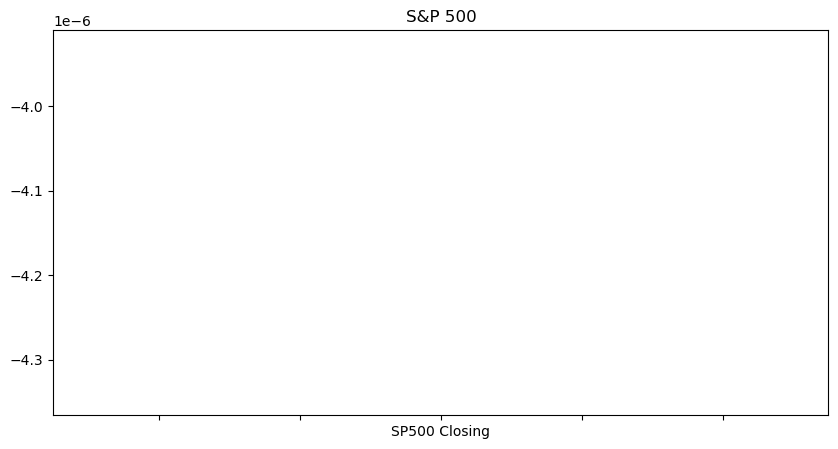

In [54]:
# Plot beta trend
ax = sp500_beta.plot(figsize=(10,5), title="S&P 500") 
sp500_beta.plot(ax=ax)



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [55]:
# Use `ewm` to calculate the rolling window

#n/a

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [56]:
#demonstrating that daily_whale_returns is all portfolios
daily_whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Closing
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.001196
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.014174
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.003944


In [57]:
# Annualized Sharpe Ratios
whale_sharpe_ratio = (
    daily_whale_returns.mean() * 252 / (daily_whale_returns.std() * np.sqrt(252))
)

whale_sharpe_ratio

SOROS FUND MANAGEMENT LLC           NaN
PAULSON & CO.INC.                   NaN
TIGER GLOBAL MANAGEMENT LLC         NaN
BERKSHIRE HATHAWAY INC              NaN
Algo 1                        -0.745412
Algo 2                         0.270121
SP500 Closing                  0.656761
dtype: float64

<Axes: >

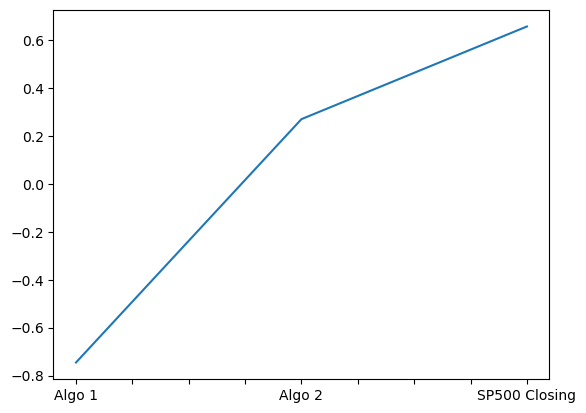

In [58]:
# Visualize the sharpe ratios as a bar plot
whale_sharpe_ratio.plot()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

#The Algo portfolios do not appear to out perform the SP500, but appear to outperform the Whales Portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [59]:
aapl_historical_csv_path = Path("Resources/aapl_historical.csv")
goog_historical_csv_path = Path("Resources/goog_historical.csv")
cost_historical_csv_path = Path("Resources/cost_historical.csv")


In [60]:
# Reading data from 1st stock
aapl_df = pd.read_csv(aapl_historical_csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [61]:
# Reading data from 2nd stock
goog_df = pd.read_csv(goog_historical_csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [62]:
# Reading data from 3rd stock
cost_df = pd.read_csv(cost_historical_csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [63]:
# Combine all stocks in a single DataFrame
new_portfolio_combined = pd.concat([aapl_df, goog_df, cost_df], axis="columns", join="inner")
new_portfolio_combined.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62


In [64]:
# Reset Date index
sorted_df = new_portfolio_combined.reset_index(drop=True)
sorted_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,AAPL,200.72,GOOG,1162.38,COST,243.47
1,AAPL,202.90,GOOG,1166.27,COST,241.34
2,AAPL,202.86,GOOG,1174.10,COST,240.18
3,AAPL,208.48,GOOG,1189.39,COST,244.23
4,AAPL,211.75,GOOG,1185.40,COST,244.62


In [65]:
# Reorganize portfolio data by having a column per symbol
columns = ["Symbol", "AAPL", "Symbol", "GOOG", "Symbol", "COST"]
sorted_df.columns = columns
sorted_df.drop(columns=['Symbol'], inplace=True)

sorted_df.head()

,AAPL,GOOG,COST
0,200.72,1162.38,243.47
1,202.90,1166.27,241.34
2,202.86,1174.10,240.18
3,208.48,1189.39,244.23
4,211.75,1185.40,244.62


In [66]:
# Calculate daily returns
new_portfolio_daily_returns = sorted_df.pct_change()

# Drop NAs
new_portfolio_df = new_portfolio_daily_returns.dropna()

# Display sample data
new_portfolio_df.head()

,AAPL,GOOG,COST
1,0.010861,0.003347,-0.008749
2,-0.000197,0.006714,-0.004806
3,0.027704,0.013023,0.016862
4,0.015685,-0.003355,0.001597
5,-0.012279,-0.019226,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [67]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
new_portfolio_returns = new_portfolio_df.dot(weights)

# Display sample data
new_portfolio_returns.head()

1    0.001820
2    0.000570
3    0.019196
4    0.004642
5   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [95]:
# Join your returns DataFrame to the original returns DataFrame
#There is no single DF that contains all of the portfolio returns, so I took the liberty of attempting to attach original dataset and new dataset
#it didnt work out so I moved forward with the exercise with the single value.

original_vs_my_portfolio_df = pd.concat([whale_returns_df, sorted_df], axis="columns", join="inner")
original_vs_my_portfolio_df.sort_index(inplace=True)
original_vs_my_portfolio_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,AAPL,GOOG,COST


In [96]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#not sure if had to read in all the values again or what error is occurring, or if its just that the values are negative#

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [97]:
# Calculate the annualized `std`
new_portfolio_annualized_std = new_portfolio_returns * np.sqrt(252)
new_portfolio_annualized_std.head()

1    0.028886
2    0.009049
3    0.304732
4    0.073696
5   -0.208453
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: >

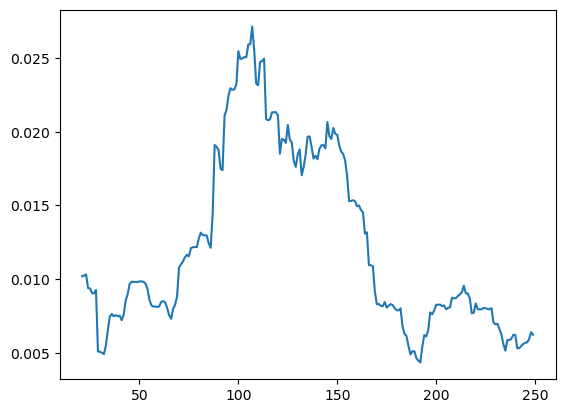

In [98]:
# Calculate rolling standard deviation
new_portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
new_portfolio_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

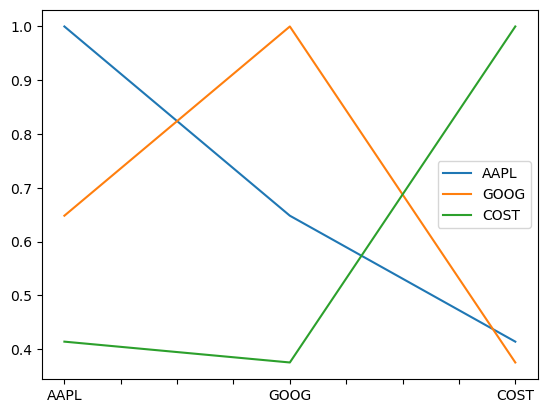

In [99]:
# Calculate and plot the correlation
correlation_df = new_portfolio_daily_returns.corr().plot()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [100]:
# Calculate and plot Beta
covariance = new_portfolio_daily_returns['COST'].cov(sp500_history_df['SP500 Closing'])

covariance




nan

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [101]:
# Calculate Annualizednew_portfolio_df Sharpe Ratios
new_portfolio_sharpe_ratio = (
    new_portfolio_df.mean() * 252 / (new_portfolio_df.std() * np.sqrt(252))
)

new_portfolio_sharpe_ratio

AAPL   -0.061751
GOOG   -0.084987
COST   -0.929405
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

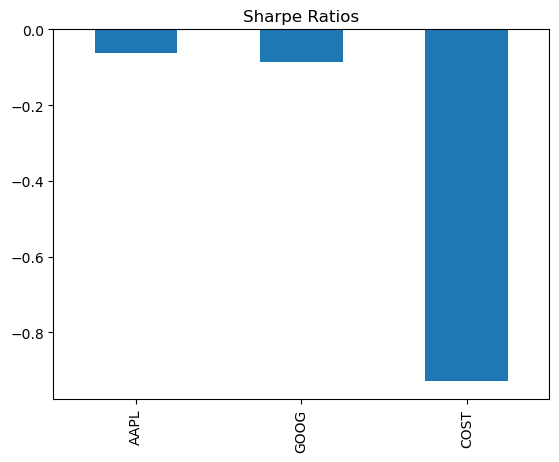

In [102]:
# Visualize the sharpe ratios as a bar plot
new_portfolio_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")


### How does your portfolio do?

Write your answer here!

In [103]:
#n/a